### First, some important definitions to enter the concept of machine learning:

https://scikit-learn.org/stable/tutorial/basic/tutorial.html


Model (algorithm) receives input data that is used to train the model and later make estimates and find functions for that data. Model processing first receives training data for it to learn and then test data (new data) for it to classify.

Models can be classified into supervised and unsupervised:

* Supervised - Receives human supervision and the data necessarily has labels (it informs what the data is, has a name or a number or an encoding). e.g.: classification and regression algorithms (algorithms classify data according to the label and features they have
* Unsupervised - They do not receive human supervision and the dice have only features (columns that inform the characteristics of the dice). e.g.: clustering algorithms (algorithms group data according to the pattern they have)

At first, intuition is also an important part of the process to guide us on how to know if the chosen model is suitable for the data set. That is, the line (function) applied to the data set should be linear or not. Of course, the skit-learn package has methodologies to assess whether the choice was good or not, but a good intuition at the starting point helps to save time and efficiency.

# SUPPORT VETOR MACHINES ALGORITHM

https://scikit-learn.org/stable/modules/svm.html

We will apply here the SVM oriented to the classification problem, although it is a powerful algorithm to be applied to the regression problem and outlier detection.

The algorithm basically consists of trying to separate classes that can be separated in a straight line (linearly separable classes) by the supervised method.

### Setup

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Fancier, statistical plots.
import matplotlib.pyplot as plt

# Plotting.
import seaborn as sns

# Datasets
from sklearn import datasets

# Support Vetor Machines Algorithm
from sklearn import svm 

# Train / Test model - Split arrays into random train and test subsets
from sklearn.model_selection import train_test_split  

# Confusion Matrix model
from sklearn.metrics import confusion_matrix

# Accuracy model
from sklearn.metrics import accuracy_score

# Precision Model
from sklearn.metrics import precision_score

# Recall Model
from sklearn.metrics import recall_score

# Classification report model
from sklearn.metrics import classification_report

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

%matplotlib inline

### Getting Started - Most Common Pack Notes - The Iris Dataset 

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [3]:
iris = datasets.load_iris() #Load the iris dataset to iris variable

In [4]:
iris.data #load the features os data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.target #Load the labels of data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target[[10, 25, 50]] #load the samples 10, 25, and 50

array([0, 0, 1])

In [7]:
list(iris.target_names) #load the names of samples 10, 25, and 50

['setosa', 'versicolor', 'virginica']

### A friendlier way to look at data - Pandas

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [8]:
# creates a dataframe from the previously loaded sckit-learn dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 

In [9]:
iris_df['target'] = iris.target # include the labels in iris_df

In [10]:
iris_df['target names'] = pd.Categorical.from_codes(iris.target, iris.target_names) #includes named labels in iris_df

In [11]:
iris_df.head() #show the first lines of iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Visualise

To discuss the concept of "linearly separable" it is first necessary to visualize the behavior of the data. Nothing better than pairplot in Seaborn, as it plots the data in pairs with the characteristics of df(columns). We verified how these species are distributed for each of the characteristics so that it is possible to have an intuition that these graphs are linearly separable, as we verified that it is possible to find a boundary between the species.

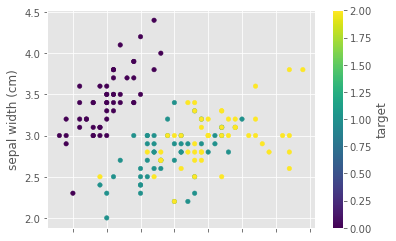

In [12]:
#plotting
iris_df.plot.scatter('sepal length (cm)', 'sepal width (cm)', c='target', cmap= 'viridis') 

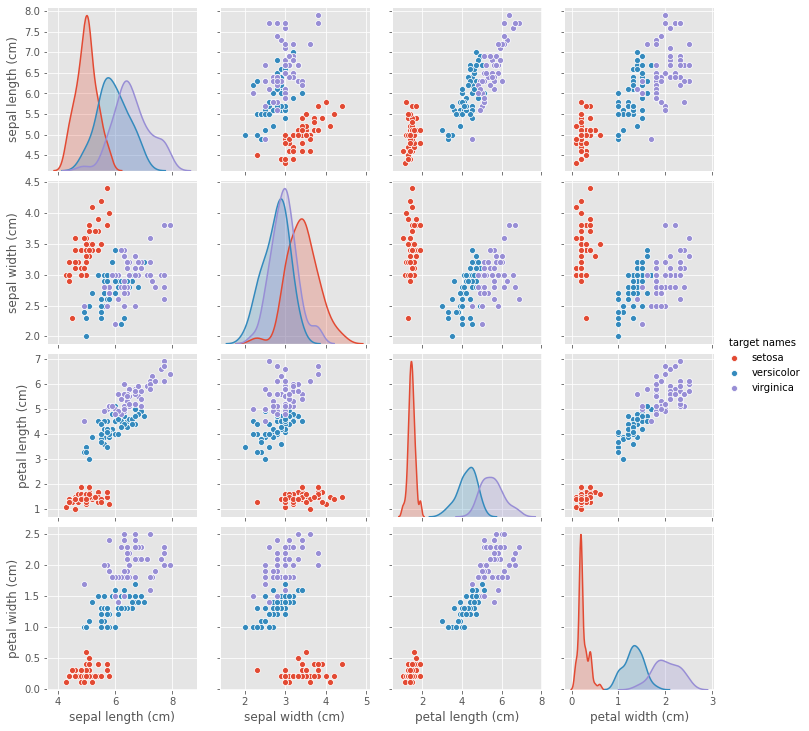

In [13]:
#plotting in pairs
sns.pairplot(iris_df[['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target names']], hue='target names')

### Deepening the SVC Model

Checking the intuition of the algorithm for two species, which margin should be better used in the model? Small? Large?
We then verified that the model needs a metric to estimate the best function to be used. The position of the line will influence the generalizability of the model, so, basically, the SVC optimizes the calculation of this margin, which in this case is the line that defines the separation between classes.


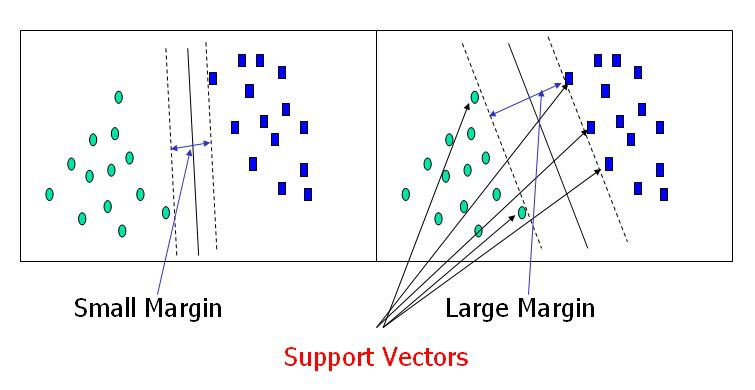

### When the dataset is not linear

In principle, SVM is better applied to a linear dataset, but there are variations of SVM (kernel trick) that allow for a good performance, although processing is higher (higher cost). The polynomial kernel and RBF are especially useful when data points are not linearly separable.


https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py

<table><tr>
<td> <img src="images/sphx_glr_plot_svm_kernels_002.png" alt="Drawing" style="width: 250px;"/ >Polynomial </td>
<td> <img src="images/sphx_glr_plot_svm_kernels_003.png" alt="Drawing" style="width: 250px;"/>RBF </td>
</tr></table>



### Test and Train Split¶ - Iris Dataset

In [14]:
#In this other notation, X is the data (features) and y is the target (label)
X = iris.data
y = iris.target

In [15]:
#applying the method of separating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)

In [16]:
X_train.shape #it indicates how many lines are left for training

(105, 4)

In [17]:
X_test.shape #it indicates how many lines are left for testing

(45, 4)

In [18]:
#instantiating a classifier using the default value of C (which indicates whether the edge is hard or soft)
clf = svm.SVC(C=1.0)

In [19]:
# applying the fit so that the model is trained by adapting the characteristics to the label in the training data
clf.fit(X_train, y_train)

SVC()

In [20]:
#making the prediction on the test set
y_pred = clf.predict(X_test)

In [21]:
y_pred

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2,
       2])

### Measuring performance

In a quick search, you can find some metrics to evaluate ranking models. However, how do you know which ones and when to use them?


MATRIX OF CONFUSION - In this matrix, each line of it represents a class (real class) and each column a predicted class.



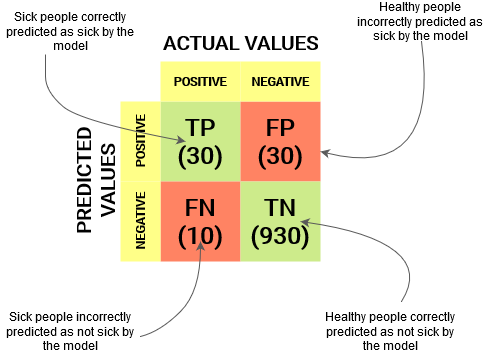

ACURACY - Indicates an overall performance of the model. Among all classifications, how many did the model correctly classify;

PRECISION - Among all the Positive class classifications that the model has made, how many are correct;

RECALL - Among all the Positive class situations as expected value, how many are correct;

F1-Score - Harmonic mean between accuracy and recall.


In some contexts we will want to look more at accuracy, in others at recall, and in some at both. 


When to use each one?

Accuracy is a good general indication of how the model performed. However, there may be situations where it is misleading. For example, when creating a credit card fraud identification template, the number of cases considered to be fraud may be quite small compared to the number of cases considered to be legal. To put it in numbers, in a hypothetical situation of 280,000 legal cases and 2000 fraudulent cases, a simple model that simply classifies everything as legal would obtain an accuracy of 99.3%. In other words, you would be validating as great a model that fails to detect fraud.

Precision can be used in a situation where False Positives are considered more harmful than False Negatives. For example, when classifying a stock as a good investment, the model needs to be correct, even if it ends up classifying good investments as bad investments (False Negative situation) in the process. In other words, the model must be precise in its ratings, because from the moment we consider it a good investment when it really isn't, a big loss of money can happen.

Recall can be used in a situation where False Negatives are considered more harmful than False Positives. For example, the model must still find all sick patients, even if it classifies some healthy ones as sick (False Positive situation) in the process. In other words, the model must have high recall, as classifying sick patients as healthy can be a tragedy.

The F1-Score is simply a way to look at only 1 metric instead of two (precision and recall) in some situation. It is a harmonic mean between the two, which is much closer to the smallest values than a simple arithmetic mean. That is, when you have a low F1-Score, it is an indication that either accuracy or recall is low.

Each metric has its own peculiarities that must be taken into account when choosing how the ranking model will be evaluated. One should not think of one as better or worse than the other in general, but rather analyze the problem and choose the ones that best fit.

In skitlearn we can find all this information in the classification report method that when passing the results that the algorithm predicted and the characteristics labels it will be possible to obtain a classification report. In this report there is a column called support which is the number of samples of the true answer that are in this class. And the last row provides a weighted average of precision, recall, and f1 score, where weights are support values.

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

In [22]:
y_test.shape

(45,)

In [23]:
# 95% of samples were correctly classified
clf.score(X_test, y_test)

0.9555555555555556

In [24]:
# Here we see the results of 14 True Positives, 0 False Positives, 0 False Negatives and 12 True Negatives for 0 and 1 labels(setosa and versicolor)
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[14,  0],
       [ 0, 12]], dtype=int64)

In [25]:
# Accuracy model - Of 45 samples 43 were correctly classified
accuracy_score(y_test, y_pred, normalize = False)

43

In [26]:
# unweighted average of each label, without taking into account label imbalance.
precision_score(y_test, y_pred, average='macro')

0.9523809523809524

In [27]:
## unweighted average of each label, without taking into account label imbalance.
recall_score(y_test, y_pred, average='macro')

0.9649122807017544

In [28]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# K- NEAREST NEIGHBORS ALGORITHM

KNN(K — Nearest Neighbors) is one of many algorithms (supervised learning) used in the field of data mining and machine learning, it is a classifier where learning is based on “how similar” is one data (a vector) to another . The training is formed by n-dimensional vectors.

This algorithm is also known as slow learning or better saying, it is a lazy algorithm. Lazy type algorithms do not need training data to generate the model, which reduces the initial process in parts, but on the other hand it will generate a need for more accurate later analysis. In the case of algorithms that do not need training, all data obtained from the dataset will be used in the test phase, resulting in very fast training and slow testing and validation, at which point we need to be very attentive to the generated results.

### Would you be able to identify edible mushrooms? And to identify the poisonous mushrooms?

In this example of applying the KN-N model we will teach the machine to classify types of poisonous and non-poisonous mushrooms.

The dataset used can be downloaded from the link below, as well as the dictionation of the existing values in the features of the dataset used:

### Setup

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

Source to download csv file:
https://www.kaggle.com/uciml/mushroom-classification

In [25]:
# Using the pandas library to import data
df = pd.read_csv('Datasets//mushrooms.csv',engine='python', sep=',')

### Exploring the dataset

In [24]:
# Checking initial data from imported dataset
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [27]:
# Understanding the dataset, columns, data types, number of records per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [1]:
import plotly.express as px

In [17]:
df = px.data.iris()
fig = px.scatter_3d(df,x='sepal_length', y='sepal_width', z='petal_width', color='species', size="species_id")
fig.show()